# 퍼셉트론 (Perceptron)
- 퍼셉트론은 논리 게이트를 모방할 수 있는 인공 신경망의 한 종류이다.
- 가중치와 편향을 통해 논리 게이트와 같은 동작을 한다.

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def activate(self, x): # perceptron 연산
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0

In [3]:
test_cases = [(0,0), (0,1), (1,0), (1,1)]

### AND 게이트

In [17]:
AND_gate = Perceptron(weights=[0.5,0.5], bias=-0.7)

for test in test_cases:
    print(f'input: {test} | output: {AND_gate.activate(test)}')

input: (0, 0) | output: 0
input: (0, 1) | output: 0
input: (1, 0) | output: 0
input: (1, 1) | output: 1


### OR 게이트

In [18]:
OR_gate = Perceptron(weights=[0.5,0.5], bias=-0.2)

for test in test_cases:
    print(f'input: {test} | output: {OR_gate.activate(test)}')

input: (0, 0) | output: 0
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 1


### NAND 게이트

In [19]:
NAND_gate = Perceptron(weights=[-0.5,-0.5], bias=0.7) # and_gate와 정반대

for test in test_cases:
    print(f'input: {test} | output: {NAND_gate.activate(test)}')

input: (0, 0) | output: 1
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 0


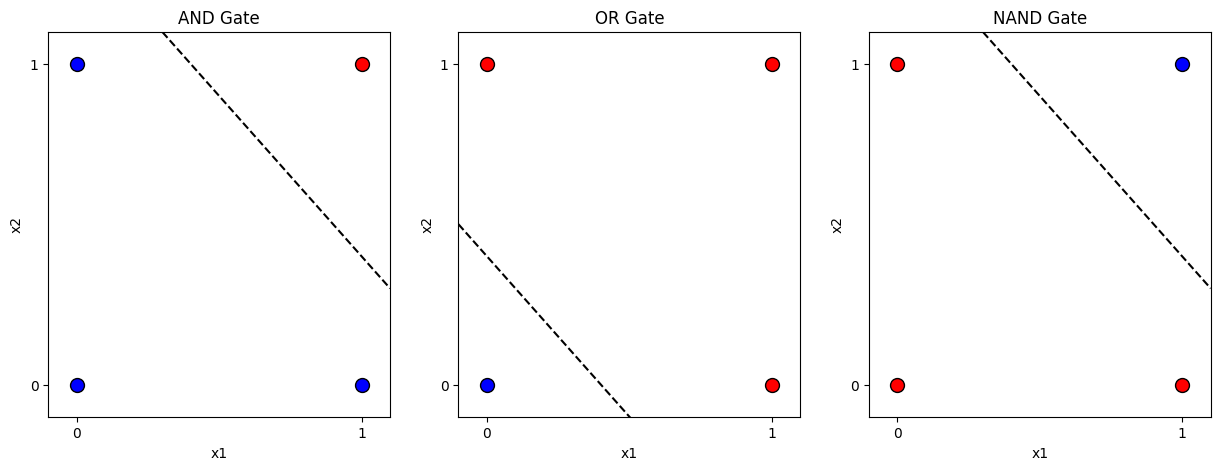

In [20]:
# 시각화
import matplotlib.pyplot as plt

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
gates = {
    "AND": AND_gate,
    "OR": OR_gate,
    "NAND": NAND_gate
}

fig, axes = plt.subplots(1,3, figsize=(15,5))

for idx, (gate_name, perceptron) in enumerate(gates.items()):
    ax = axes[idx]
    outputs = np.array([perceptron.activate(x) for x in inputs]) # input값에 따라 나오는 것들로 배열을 구성

    # input 값을 결과에 따라 산점도로 표시
    for (x1, x2), y in zip(inputs, outputs): # output 결과를 가지고 scatter를 찍음
        ax.scatter(x1, x2, c='red' if y==1 else 'blue', s=100, edgecolor='black') #inputs에서 넘겨준 두 원소를 가지고 점의 위치를 찍어줄거기 때문에 output까지 받은거임 output값에 따라 color가 달라짐
    
    # 결정 경계 표현
    x_vals = np.linspace(-0.1, 1.1, 100) # x1 # x값을 0 or 1로 줬기 때문에 확장된 범위에서 경계 표현을 해주기 위해 -0.1부터 1.1까지 100개의 구간으로 나눠서 결정 경계를 그리기 위한 x값을 준 것임
    y_vals = (-perceptron.weights[0] * x_vals - perceptron.bias) / perceptron.weights[1] # x2 # w1x + w2y + w3 = 0 ---y를 두고 이항하면---> y = -w1x/w2 - w3/w2 # 선형 분리를 하기 위해 사용
    ax.plot(x_vals, y_vals, 'k--')

    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_title(f'{gate_name} Gate')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

plt.show()

### XOR 게이트

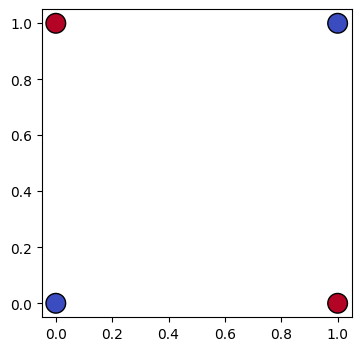

In [21]:
# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# 시각화
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, s=200, edgecolors='black', cmap='coolwarm')
plt.show()

# 다층 퍼셉트론 (Multi-Layer Perceptron, MLP)

In [ ]:
# XOR gate의 역할: nand gate를 통과시켜서 나온 결과와 or gate를 통과시켜 나온 결과를 가져와서 and gate를 통과시킴
def XOR_gate(x1, x2):
    nand_out = NAND_gate.activate([x1, x2])
    or_out = OR_gate.activate([x1, x2])
    return AND_gate.activate([nand_out, or_out])

In [26]:
for x1, x2 in test_cases:
    print(f'input: {x1}, {x2} | output: {XOR_gate(x1, x2)}') # 왜 activate는 안됐던건가요 -> Perceptron 객체가 아니라서

input: 0, 0 | output: 0
input: 0, 1 | output: 1
input: 1, 0 | output: 1
input: 1, 1 | output: 0


In [ ]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# 다층 퍼셉트론은 X,y만 가지고 알아서 학습을 하는거라 성능이 안좋음
# 다층 퍼셉트론은 은닉층이 많아질수록 학습 성능이 높아짐
mlp = MLPClassifier(
    hidden_layer_sizes=(4,4),        # 은닉층의 크기 # (2,) : 은닉층이 하나 있다는 것을 뜻함 # (4,4) : 은닉층을 키워줬더니 성능을 내고 있음 -> 은닉층에 레이어 추가 
    activation='relu',              # 활성화 함수
    solver='adam',                  # 가중치 업데이트 방식 (최적화 알고리즘)
    max_iter=1000,                  # 모델의 학습 반복 횟수 (epoch) # 여기선 천 번의 에폭이 일어남
    random_state=42                 # 가중치 초기화 값 고정
)

mlp.fit(X, y)
pred = mlp.predict(X)
for i in range(4):
    print(f'XOR({X[i][0]}, {X[i][1]}) = {pred[i]}')

print(mlp.n_layers_) # 입력, 출력, 은닉층 2개라 layer가 4개

# 다층 퍼셉트론에서 은닉층의 크기에 따라 어떻게 결과가 변하는지 봅시다

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0
4


In [37]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])


hidden_layers = [(1,), (2,), (4,), (8,)] # 1,2,4,8은 뉴런의 개수이고, 뉴런의 개수를 바꿔서 넣어줌
# 은닉층이 하나인 상태에서 뉴런의 개수(1,2,4,8로)를 바꿔주는거임
# 뉴런의 개수만 바꿔주더라도 성능이 나아지는 것을 볼 수 있음

for config in hidden_layers:
    mlp = MLPClassifier(
        hidden_layer_sizes=config,        # 은닉층의 크기
        activation='relu',              # 활성화 함수 
        solver='adam',                  # 가중치 업데이트 방식 (최적화 알고리즘)
        max_iter=1000,                  # 모델의 학습 반복 횟수 (epoch) 
        random_state=42                 # 가중치 초기화 값 고정
    )

    mlp.fit(X, y)
    pred = mlp.predict(X)
    print(f'은닉층 구조 {config} -> XOR 예측 결과: {pred}')

은닉층 구조 (1,) -> XOR 예측 결과: [0 1 0 1]
은닉층 구조 (2,) -> XOR 예측 결과: [1 1 1 1]
은닉층 구조 (4,) -> XOR 예측 결과: [0 0 0 0]
은닉층 구조 (8,) -> XOR 예측 결과: [0 1 1 0]


In [38]:
# 하이퍼파라미터를 조정해서 결과가 잘 나오도록 함
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

hidden_layers = [(1,), (2,), (4,), (8,)] 

for config in hidden_layers:
    mlp = MLPClassifier(
        hidden_layer_sizes=config,        # 은닉층의 크기
        activation='tanh',              # 활성화 함수 
        solver='lbfgs',                  # 가중치 업데이트 방식 (최적화 알고리즘)
        max_iter=5000,                  # 모델의 학습 반복 횟수 (epoch) 
        random_state=42                 # 가중치 초기화 값 고정
    )

    mlp.fit(X, y)
    pred = mlp.predict(X)
    print(f'은닉층 구조 {config} -> XOR 예측 결과: {pred}')

은닉층 구조 (1,) -> XOR 예측 결과: [0 1 1 1]
은닉층 구조 (2,) -> XOR 예측 결과: [1 0 1 0]
은닉층 구조 (4,) -> XOR 예측 결과: [0 1 1 0]
은닉층 구조 (8,) -> XOR 예측 결과: [0 1 1 0]
